# Generate data

In [1]:
import sys
sys.path.append("/Users/danmohad/Documents/Stanford/Courses/Year 5/CS230/project/nn_physical_concepts")

import scinet.ed_gaslaw as ed
from scinet import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For pretty, Latex-style plots
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 21}) #3x

# Matlab plotting colours\n",
colorvec = [[0, 0.4470, 0.7410],[0.8500, 0.3250, 0.0980],
            [0.9290, 0.6940, 0.1250],[0.4940, 0.1840, 0.5560],
            [0.4660, 0.6740, 0.1880],[0.3010, 0.7450, 0.9330],
            [0.6350, 0.0780, 0.1840]]


In [3]:
# Dataset constants
name = "gaslaw"
l_obs = 3
l_ques = 2
l_ques_obs = 0
l_ans = 1

# Dataset parameters
n_ex = 100000
n_obs = 5
n_ques_obs = 0
n_ques = 1 # always
percent_validation = 5.0

# It is necessary to scale the inputs, otherwise Tensorflow forward pass diverges.
# pressure:  p_r * 100000.0
# Temperature: T_r * 300.0
p_r = [0.5, 2.0]
T_r = [0.7, 2.0]

# Network architecture parameters
latent_size = 1
encoder_layout = [150,100]
decoder_layout = [100,150]

In [4]:
N = n_ex
N_inp1 = l_obs*n_obs
N_inp2 = l_ques_obs*n_ques_obs + l_ques*n_ques
N_out = l_ans*n_ques

In [5]:
ed.generate_data(N, n_obs, p_interval=p_r, T_interval=T_r, M1=0.04, M2=0.004,
                 fileName=name + "_data");

In [6]:
td, vd, _, vs, _ = dl.load(percent_validation, name + "_data")

In [7]:
net = nn.Network(N_inp1, latent_size, N_inp2, N_out, 
                 encoder_num_units=encoder_layout, decoder_num_units=decoder_layout,
                 name=name + "_net");








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









In [8]:
# Initial validation error
print(net.run(vd, net.recon_loss))

0.13433059


In [9]:
net.train(500, 256, 0.001, td, vd)

  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
# Validation error
print(net.run(vd, net.recon_loss))

0.00011379957


In [23]:
# Training error
print(net.run(td, net.recon_loss))

0.00011247786


# Analyze results

In [21]:
def plot_state_neuron_wrt_Rbar(nn,data,data_states):
    out = nn.run(data, nn.mu, additional_params={})
    Z = data_states
    R = 8.314 / ((Z/M1) + ((1.0-Z)/M2))
    plt.scatter(R, out.flatten(), s=0.1)
    plt.ylabel(r"$a_{lat}$")
    plt.xlabel(r"$\overline{R}$")
    plt.tight_layout()
    plt.savefig("a_vs_Rbar.png", dpi=300)

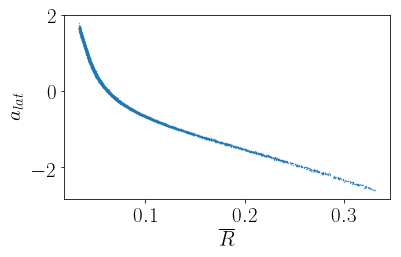

In [22]:
M1 = 0.04
M2 = 0.004
plot_state_neuron_wrt_Rbar(net, vd, vs)